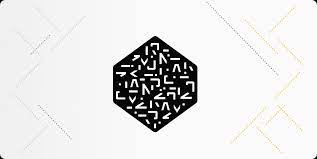

This is a simple EDA (Exploratory Data Analysis) notebook, showing the OHLCV data of NMR/USDT fetched from [Binance](https://accounts.binance.com/en/register?ref=121841880).

# Libraries

In [ ]:
!pip install mplfinance
import mplfinance as mpf

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import pathlib
from tqdm.auto import tqdm
import json
from multiprocessing import Pool, cpu_count
import time
import requests as re
from datetime import datetime, timedelta, timezone
from dateutil.relativedelta import relativedelta, FR

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib_venn import venn2, venn3
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('seaborn-colorblind')

import warnings
warnings.simplefilter('ignore')

# Load data

In [ ]:
df = pd.read_csv('../input/nmrusdt-binance-daily-ohlcv/binance_nmrusdt.csv')
df = df.drop_duplicates(subset=['time'], keep='last')
print(df.shape)
df.head()

In [ ]:
df.tail()

# Plot candles

In [ ]:
# convert dataframe for mplfinance
df.index = pd.to_datetime(df['time'])
del df['time']
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']


In [ ]:
# plot candles via mplfinance (daily, with 5 & 25 days moving average)
print('daily')
mpf.plot(
    df
    , type='candle'
    , volume=True
    , figratio=(12,4)
    , mav=(5, 25)
    , style='yahoo'
)

In [ ]:
# weekly
d_ohlcv = {'Open': 'first',
           'High': 'max',
           'Low': 'min',
           'Close': 'last',
           'Volume': 'sum'}

df_w = df.resample('W-MON', closed='left', label='left').agg(d_ohlcv)
print(df_w.head())

In [ ]:
print('weekly')
mpf.plot(
    df_w
    , type='candle'
    , volume=True
    , figratio=(12,4)
    , mav=(5, 25)
    , style='yahoo'
)

DONE!